In [22]:
import tensorflow as tf
from tensorboard.backend.event_processing.event_file_loader import EventFileLoader
from tensorboard.plugins.scalar import metadata
import matplotlib.pyplot as plt

import plotly.express as px
import pandas as pd

def read_tensorboard_log(log_dir):
    event_file = tf.compat.v1.train.summary_iterator(log_dir)
    data = {}
    for event in event_file:
        if event.HasField('summary'):
            for value in event.summary.value:
                if value.tag not in data:
                    data[value.tag] = [[],[]]
                # print(value)
                data[value.tag][0].append(event.step)
                data[value.tag][1].append(tf.make_ndarray(value.tensor))

    return data



Value_Loss


Utility


Fairness


Min_Utility


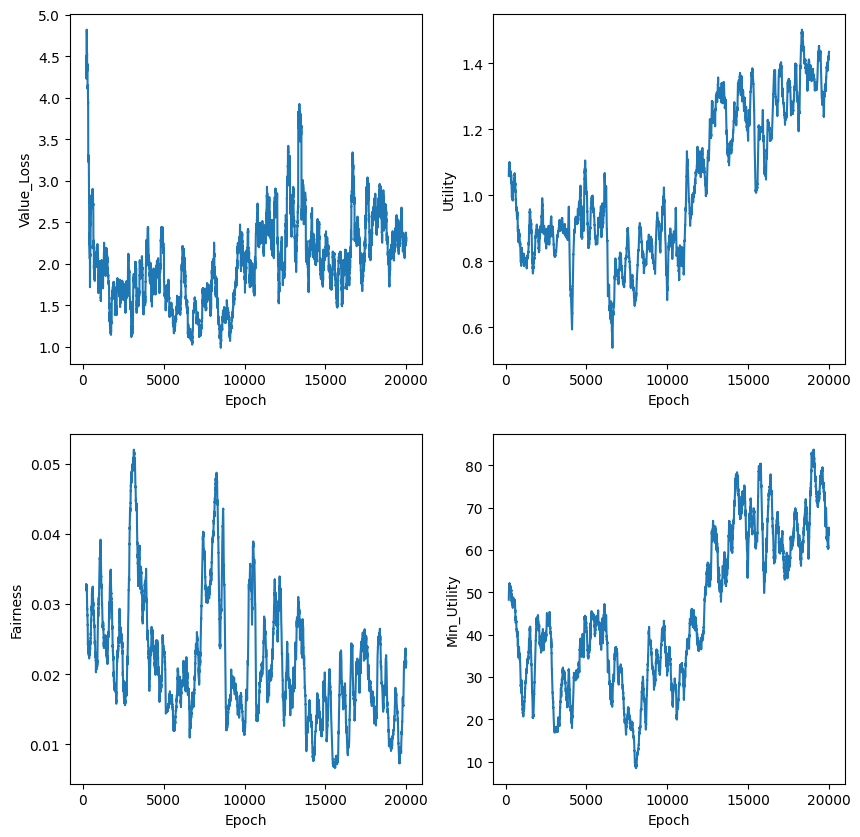

In [23]:
logdir = 'logs/metrics/events.out.tfevents.1686942566.yoda.1326185.0.v2'
logdir = 'logs/metrics2/events.out.tfevents.1686972630.yoda.1509697.0.v2'
logdir = 'logs/metrics_DQN/events.out.tfevents.1687382162.yoda.3496151.0.v2'
logdir = 'logs/metrics_DQN_Reallocate/events.out.tfevents.1687466688.yoda.2016143.0.v2'
logdir = 'logs/metrics_DQN_Reallocate/events.out.tfevents.1687467357.yoda.2052725.0.v2'


data = read_tensorboard_log(logdir)

keys = ['Policy_Loss', 'Value_Loss', 'Utility', 'Fairness']
keys = [ 'Value_Loss', 'Utility', 'Fairness', 'Min_Utility']
# keys = ['Utility', 'Fairness']

#Plot subfigures
fig = plt.figure(figsize=(10, 10))
for i, key in enumerate(keys):
    x = data[key][0]
    y = data[key][1]
    # print(key, x, y)
    #plot a smoothed curve
    y_smooth = pd.DataFrame(y).rolling(200).mean()
    # y_smooth = y
    df = pd.DataFrame({'Epoch': x, key: y_smooth[0]})
    plt.subplot(2, 2, i+1)
    plt.xlabel('Epoch')
    plt.ylabel(key)
    plt.plot(x, y_smooth)
# plt.show()

#plot 2x2 subfigures using plotly
for i, key in enumerate(keys):
    x = data[key][0]
    y = data[key][1]
    # print(key, x, y)
    print(key)
    #plot a smoothed curve
    y_smooth = pd.DataFrame(y).rolling(200).mean()
    # y_smooth = y
    #change the size of the figure
    px.defaults.width = 1000
    df = pd.DataFrame({'Epoch': x, key: y_smooth[0]})
    fig = px.line(df, x='Epoch', y=key, title=key)
    fig.show()
